# Art(ists)(work)
(Milestone 3 - Task 1: Address project feedback)
## Introduction

### Information About the Data
<!-- (features and attributes)(When you explain the data, make sure to explain each feature (columns) of the data) -->

### Research Questions
<!-- (Explain the importance of those questions) -->

#### What is the Gender Gap between Female and Male Artists within the Artists dataset? Does this ratio differ in American Artists?

<!-- For every female artist in this dataset, there are 7.82 males. For artists with American Nationaliity, there are 5.75 males to each female.
 -->
This question is important because it addresses the gender disparity in artists that have their work shown in museums. The most commonly known famed artists are men. When we get asked to name an artists, we name men: "Da Vinci, Michelangelo, Andy Warhol, Van Gogh, Rembrandt, Monet, Picasso, Pollock, Dalí. This question seeks not to discredit all great male artists, but pokes at how we can only see and remember men for their work.

![Guerilla Girls Question of the Millenia](https://images.squarespace-cdn.com/content/v1/55d4aaa8e4b084df273878ef/1457484583067-MGV9RK21IU92D5IZSRQ7/ke17ZwdGBToddI8pDm48kJZd-40CROhaxSHkn94W3lYUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKci3uyapVXXl-cvqrhWycPgAyo8byC-gQC2I3_EKk_-G9mC7G1me3imrmd4PIfeweu/Naked1989.jpg?format=1500w)

Fig 1. "Do Women STILL Have to be Naked to Get Into the Met. Museum?", Guerilla Girls 

The subquestion seeks to define a difference in the gender ratio in American artists instead of the whole dataset. I speculate that there would be a higher, albeit still low, female to male ratio because an American Museum would want to display more American female artists.

#### What are the top five Nationalities in the Artists Dataset?

<!-- The top five Nationalities in this dataset are American, French, German, British and Italian. This clearly shows how Eurocentric MoMA is. -->

This dataset is from the Museum of Modern Art in America, but what other countries are the artists from? I want to discover what the top five nationalities in artists tells us about the museum itself. In short, the importance of this question lies in the importance of artist nationality.

#### What is the average death of Artists within MoMA?

<!-- The average age of death of artists in this dataset is 72.8. -->
<!--  histogram? some binomial thang?-->
<!--  can't for the life of me find a reason why this question is important haha-->

#### What are the 5 most popular Classifications?

<!-- The top 5 Classifications of Artworks are Print, Photograph, Illustrated Book, Drawing, and Design. -->
I want to find out which category of Classification holds the greatest quantity because it could show how some Classifications are more "modern" than others. Maybe the most popular methods will also tell us how artists prefer one method over another.

## Analysis
<!-- (why exactly you chose those visualization methods) -->

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# functions
def load_and_process(path):
       #(Load data and deal with missing data)
    df = (
        pd.read_csv(path)
        .dropna()        )
    return df

def clean_date(row): # some dates are ranges. this function choses the start date
    if(len(row.Date)>4):
        x = row.Date.split('-')
        row.Date = x[0]

    return row.Date    
def clean_df_artworks(artworks):
    df_cleaned = artworks.copy()
    df_cleaned['Date'] = df_cleaned.apply(lambda row: clean_date(row), axis=1)
    return df_cleaned

In [5]:
path_artists  = "../../data/raw/artists.csv"
path_artworks = "../../data/raw/artworks.csv"

df_artists = load_and_process(path_artists) # all these artists are dead
df_artists_all = pd.read_csv(path_artists) # dead and alive
df_artworks = pd.read_csv(path_artworks)
df_artworks = clean_df_artworks(df_artworks[df_artworks['Date'].notna()])

# cleaning
df_artists= df_artists[df_artists.Gender != 'male'] #got rid of one mismarked row
df_artists = df_artists[df_artists.Nationality != 'Nationality unknown'] # some artists have an unknown nationality, got rid of that

### Gender


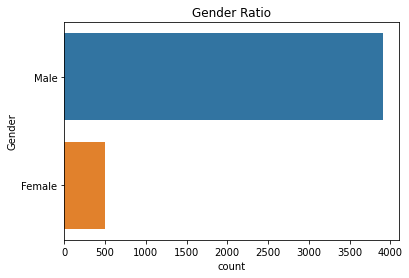

In [9]:
gender = sns.countplot(y='Gender',data=df_artists).set_title('Gender Ratio')
male_female_ratio = (df_artists[df_artists.Gender == 'Male'].count()/df_artists[df_artists.Gender == 'Female'].count())

Fig 1. We can see that for every female artist in MoMA, there are 7.82 males.

#### American Gender Ratio
Let's see the American male and female chart:

Artist ID      5.746154
Name           5.746154
Nationality    5.746154
Gender         5.746154
Birth Year     5.746154
Death Year     5.746154
dtype: float64

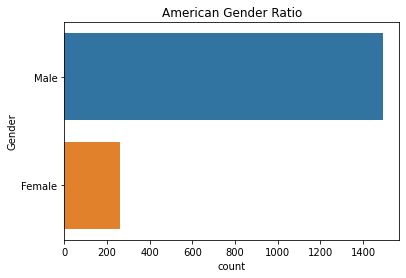

In [10]:
df_am_gender = df_artists[df_artists['Nationality']=='American']
gender_am = sns.countplot(y='Gender',data=df_am_gender).set_title('American Gender Ratio')
am_male_female_ratio = (df_am_gender[df_am_gender.Gender == 'Male'].count()/df_am_gender[df_am_gender.Gender == 'Female'].count())
am_male_female_ratio

Fig 2. The American male to female ratio is 5.75, which is better.

### Nationality 
I want to see which which Nationality is the most represented in the MoMA artists

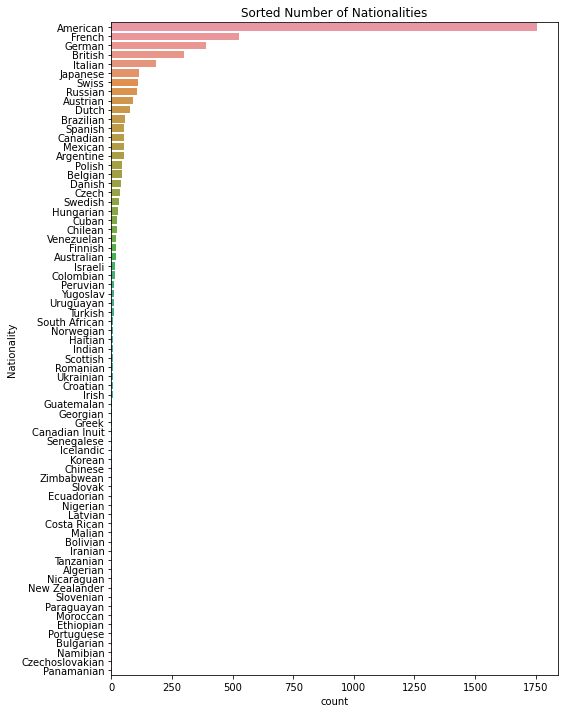

In [11]:
nationality=sns.countplot(y='Nationality',data=df_artists,order = df_artists['Nationality'].value_counts().index).set_title('Sorted Number of Nationalities')
fig = plt.gcf()
fig.set_size_inches(8, 12)

Fig 3.Top 5 Nationalities (by count): American, French, German, British, Italian

### Age 
I am going to see if there is anything in Birth Year and Death Year (EDA)

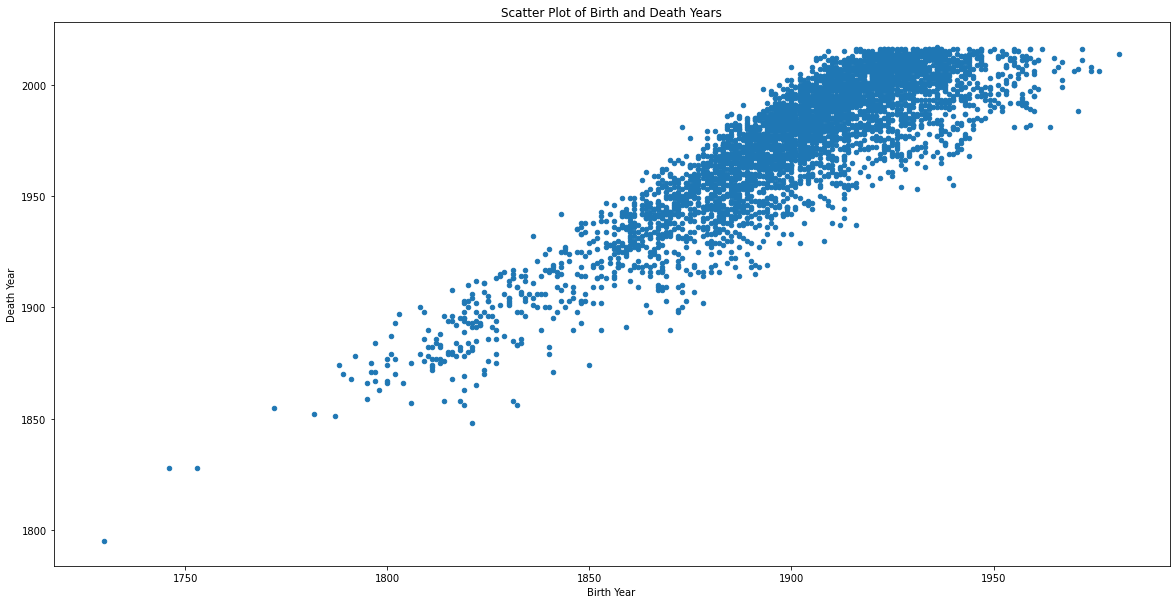

In [12]:
df_artists.plot(kind='scatter', x='Birth Year', y='Death Year').set_title('Scatter Plot of Birth and Death Years')
fig = plt.gcf()
fig.set_size_inches(20, 10)

Fig 4. EDA
From scatter plot, I can see that the definition of "Modern" works are created by artists born around the late 1800's. So "Modern" most popularily
means post-1900's.

72.79596463386987

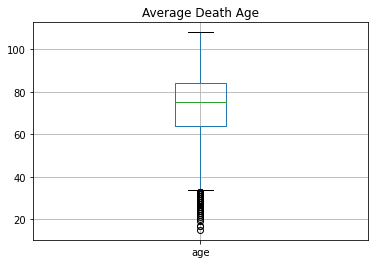

In [13]:
df_artists['age']=(df_artists['Death Year']-df_artists['Birth Year'])
df_artists
df_artists.boxplot('age').set_title('Average Death Age')
df_artists['age'].mean()
# TA : don't use boxplot

Artists in this dataset died at the average age of 72.8.

### Artwork

What are the 5 most popular Classifications?

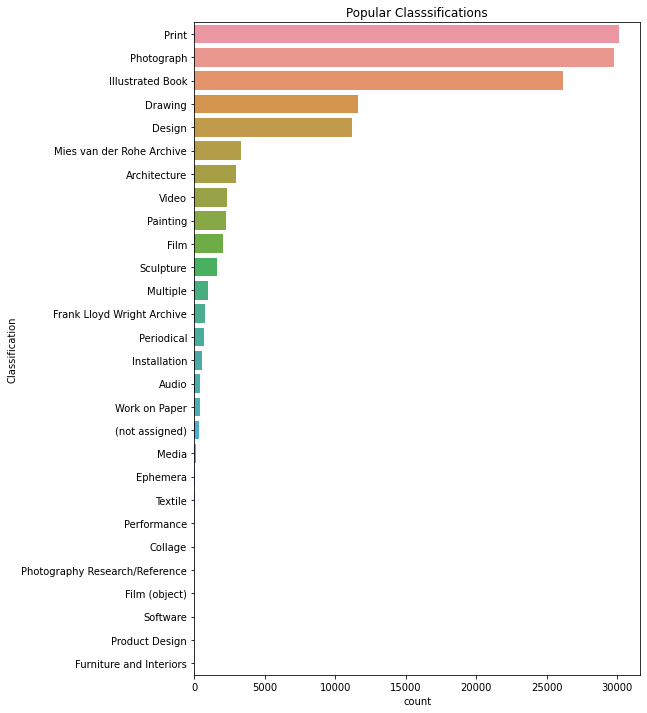

In [200]:
plot_class=sns.countplot(y='Classification',data=df_artworks,order = df_artworks['Classification'].value_counts().index).set_title('Popular Classsifications')
fig = plt.gcf()
fig.set_size_inches(8, 12)

Top 5 Classifications: Print, Photograph, Illustrated Book, Drawing, and Design

## Conclusion
<!-- ( Add a conclusion at the end of your analysis and explain whether your analysis answered your questions or not. And add some suggestions for future works)
 -->

#### References

[Guerilla Girls Image](https://www.guerrillagirls.com/naked-through-the-ages)